## Getting ready

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

In [7]:
example = pd.DataFrame({'date_1': ['04/12/2018', '05/12/2019', '07/12/2020'],
                        'date_2': ['12/5/2018', '15/5/2015', '18/5/2016'],
                        'date_3': ['25/8/2019', '28/8/2018', '29/8/2017']})

## How to do it

In [8]:
class DateProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, date_format='%d/%m/%Y', hours_secs=False):
        self.format = date_format
        self.columns = None
        # see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
        self.time_transformations = [
            ('day_sin', lambda x: np.sin(2*np.pi*x.dt.day/31)),
            ('day_cos', lambda x: np.cos(2*np.pi*x.dt.day/31)),
            ('dayofweek_sin', lambda x: np.sin(2*np.pi*x.dt.dayofweek/6)),
            ('dayofweek_cos', lambda x: np.cos(2*np.pi*x.dt.dayofweek/6)),
            ('month_sin', lambda x: np.sin(2*np.pi*x.dt.month/12)),
            ('month_cos', lambda x: np.cos(2*np.pi*x.dt.month/12)),
            ('year', lambda x: (x.dt.year - x.dt.year.min()) / (x.dt.year.max() - x.dt.year.min()))
        ]
        if hours_secs:
            self.time_transformations = [
                ('hour_sin', lambda x: np.sin(2*np.pi*x.dt.hour/23)),
                ('hour_cos', lambda x: np.cos(2*np.pi*x.dt.hour/23)),
                ('minute_sin', lambda x: np.sin(2*np.pi*x.dt.minute/59)),
                ('minute_cos', lambda x: np.cos(2*np.pi*x.dt.minute/59))
            ] + self.time_transformations
    
    def fit(self, X, y=None, **fit_params):
        self.columns = self.transform(X.iloc[0:1,:]).columns
        return self
    
    def transform(self, X, y=None, **fit_params):
        transformed = list()
        for col in X.columns:
            time_column = pd.to_datetime(X[col], format=self.format)
            for label, func in self.time_transformations:
                transformed.append(func(time_column))
                transformed[-1].name = transformed[-1].name + '_' + label
        transformed = pd.concat(transformed, axis=1)
        return transformed
            
    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X) 

## How it works

In [11]:
DateProcessor().fit_transform(example)

,date_1_day_sin,date_1_day_cos,date_1_dayofweek_sin,date_1_dayofweek_cos,date_1_month_sin,date_1_month_cos,date_1_year,date_2_day_sin,date_2_day_cos,date_2_dayofweek_sin,...,date_2_month_sin,date_2_month_cos,date_2_year,date_3_day_sin,date_3_day_cos,date_3_dayofweek_sin,date_3_dayofweek_cos,date_3_month_sin,date_3_month_cos,date_3_year
0,0.724793,0.688967,8.660254e-01,0.5,-2.449294e-16,1.0,0.0,0.651372,-0.758758,-0.866025,...,0.5,-0.866025,1.000000,-0.937752,0.347305,-2.449294e-16,1.0,-0.866025,-0.5,1.0
1,0.848644,0.528964,1.224647e-16,-1.0,-2.449294e-16,1.0,0.5,0.101168,-0.994869,-0.866025,...,0.5,-0.866025,0.000000,-0.571268,0.820763,8.660254e-01,0.5,-0.866025,-0.5,0.5
2,0.988468,0.151428,0.000000e+00,1.0,-2.449294e-16,1.0,1.0,-0.485302,-0.874347,0.866025,...,0.5,-0.866025,0.333333,-0.394356,0.918958,8.660254e-01,0.5,-0.866025,-0.5,0.0


## There's more...

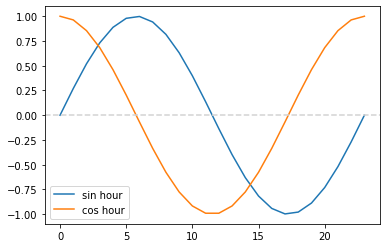

In [13]:
import matplotlib.pyplot as plt

sin_time = np.array([[t, np.sin(2*np.pi*t/23)] for t in range(0, 24)])
cos_time = np.array([[t, np.cos(2*np.pi*t/23)] for t in range(0, 24)])

plt.plot(sin_time[:,0], sin_time[:,1], label='sin hour')
plt.plot(cos_time[:,0], cos_time[:,1], label='cos hour')
plt.axhline(y=0.0, linestyle='--', color='lightgray')
plt.legend()
plt.show()

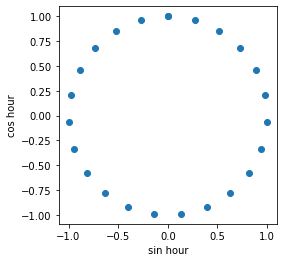

In [15]:
ax = plt.subplot()
ax.set_aspect('equal')
ax.set_xlabel('sin hour')
ax.set_ylabel('cos hour')
plt.scatter(sin_time[:,1], cos_time[:,1])
plt.show()